# Project: Investigate a Dataset (The Movie Database-october-2022)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
●
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
●
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
●
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


Questions to be asked:

Which genres are most popular from year to year? 

Most and least profitable genres

What kinds of properties are associated with movies that have high revenues?

Does the runtime of a movie affect it's ratings?

who is the director of the most and least movie rating?

who is the actor associated with the highest rated movies?


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [41]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 1- Getting the number of samples provided and the number of rows

In [56]:
size=df.shape
print('We have data on {} movies with {} rows'.format(size[0],size[1]))

We have data on 10865 movies with 21 rows


>We have 10865 samples and 21 rows

#### 2- Checking for missing values

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### 3- Checking data types of columns

In [51]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> as per the above result we can see that we have null values in the following rows:
imdb_id
,cast
,homepage
,director
,tagline
,keywords
,overview 
,genres
,production_companies

#### 4- Checking for duplications

In [44]:
sum(df.duplicated())
# df.drop_duplicates(inplace=True)

1

>there is only 1 duplicate row

#### 5- Checking unique values

In [45]:
df['imdb_id'].nunique()

10855

In [46]:
df['id'].nunique()

10865

#### 6- Checking duplications in id

In [47]:
df['id'].duplicated().sum()

1

checking to see the 11 duplicates in imdb_id whether they are linked to the same original_title

In [49]:
df.duplicated(['imdb_id','original_title']).sum()

1

#### Checking for 0 values in budget , revenue, runtime

In [65]:
Null_budget= df.query('budget == 0')
Null_budget

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,2066-05-20,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.0,0.000000e+00


In [66]:
Null_revenue= df.query('revenue == 0')
Null_revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.0


In [67]:
Null_runtime= df.query('runtime == 0')
Null_runtime

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,2015-01-01,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,2015-01-01,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,2015-11-10,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,2014-01-01,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,2014,0.000000e+00,0.0


#### 7- Data description

In [52]:
# Brief description of the data available
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

#### Removing the 1 row duplication that was previously found

In [54]:
df.drop_duplicates(inplace=True)

#### Checking that the duplication was removed

In [55]:
sum(df.duplicated())

0

#### Changing realease date from object( string ) to data type to date time to be able to moniter data

In [58]:
df.release_date = pd.to_datetime(df['release_date'])

#### Checking that the change was done

In [59]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### Removing zero values that were found

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

In [70]:
# replacing 0 with NULL in runtime to not be confused as a value when exploring data
df['runtime'] =df['runtime'].replace(0, np.NAN)

> We can note that any movie with 0 revenue and 0 budget cannot ba valid data so should be removed to avoid data messup

In [71]:
df['budget'] =df['budget'].replace(0, np.NAN)
df['revenue'] =df['revenue'].replace(0, np.NAN)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                5169 non-null   float64       
 4   revenue               4849 non-null   float64       
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10834 non-null  float64       
 13  genres          

In [73]:
df = df.dropna(axis=0, subset=['budget'])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5169 non-null   int64         
 1   imdb_id               5168 non-null   object        
 2   popularity            5169 non-null   float64       
 3   budget                5169 non-null   float64       
 4   revenue               3854 non-null   float64       
 5   original_title        5169 non-null   object        
 6   cast                  5158 non-null   object        
 7   homepage              1707 non-null   object        
 8   director              5165 non-null   object        
 9   tagline               4553 non-null   object        
 10  keywords              4838 non-null   object        
 11  overview              5169 non-null   object        
 12  runtime               5166 non-null   float64       
 13  genres           

In [75]:
df = df.dropna(axis=0, subset=['revenue'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   imdb_id               3854 non-null   object        
 2   popularity            3854 non-null   float64       
 3   budget                3854 non-null   float64       
 4   revenue               3854 non-null   float64       
 5   original_title        3854 non-null   object        
 6   cast                  3850 non-null   object        
 7   homepage              1426 non-null   object        
 8   director              3853 non-null   object        
 9   tagline               3574 non-null   object        
 10  keywords              3716 non-null   object        
 11  overview              3854 non-null   object        
 12  runtime               3854 non-null   float64       
 13  genres           

>> The null values found in columns production companies , keywords , tagline , homepage , cast . should not make any diffrence since they are provided for extra information on the movie and they don't provide critical data 
 But the null value in director could affect our investigation so will delete the entry with null director value

In [82]:
df = df.dropna(axis=0, subset=['director'])

In [83]:
df.shape

(3853, 21)

> as we can see the data has been filtered completly to avoid any unlogical information from appearing
 so the number of movie entries has been filtered to 3853 with 21 rows used

# <a id='eda'></a>
## Exploratory Data Analysis


### First there are some common functions that we might need frequently

A commonly needed function to be able to seperatly use data that is pipelined together 

In [85]:
def pipe(column):
    #will take a column, and separate the string by '|'
    piplined = df[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    unpiplined = pd.Series(piplined.split('|'))
    
    #arranging in descending order
    count = unpiplined.value_counts(ascending = False)
    
    return count

A commonly needed function to be able to quickly define the max , min values of a column and getting the movie detalis under that value 

In [110]:
def max_min(column):
    #for highest earned 
    max_profit= df[column].idxmax()
    max_movie_details = pd.DataFrame(df.loc[max_profit])

    #for lowest earned 
    min_profit= df[column].idxmin()
    min_movie_details = pd.DataFrame(df.loc[min_profit])
    
    #collectin data in one place
    info=pd.concat([max_movie_details, min_movie_details], axis=1)
    
    return info

## PROFITS

Calculating all movies profits and adding it to our datasheet to better determine the best profitable qualities of a movie

In [132]:
df.insert(0,'profit',df['revenue']-df['budget'])
df.head()

,profit,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,1.363529e+09,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,2.284364e+08,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,1.852382e+08,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,1.868178e+09,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,1.316249e+09,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


>PROFITS PER MOVIES

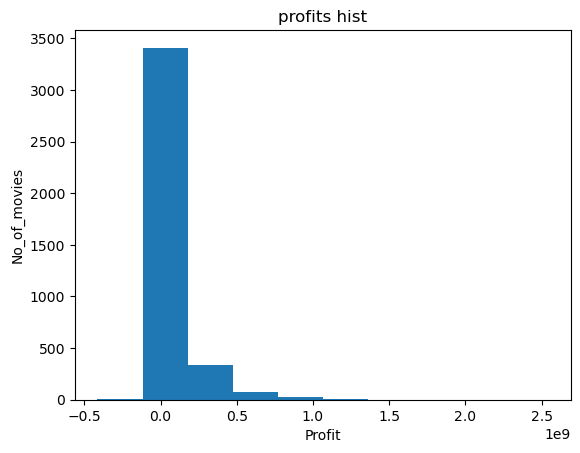

In [138]:
# plot
fig, ax = plt.subplots()
VP = ax.hist(df['profit'])
# Set title
ax.set_title("profits hist")
  
# adding labels
ax.set_xlabel('Profit')
ax.set_ylabel('No_of_movies')
plt.show()

We can see that not many movies acheive profits after their release.
Showing how important that analysis is to help change that

 >Movies with highest and lowest profit details

In [111]:
max_min('profit')

,1386,2244
profit,2544505847.0,-413912431.0
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.432768,0.25054
budget,237000000.0,425000000.0
revenue,2781505847.0,11087569.0
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
homepage,http://www.avatarmovie.com/,http://www.iamrogue.com/thewarriorsway
director,James Cameron,Sngmoo Lee


> Maximum profit was 2.5 billion dollars  and the minimum profit was in -ve values

In [142]:
df['profit'].mean()

70499442.09135738

>Average profit is 70 million $

## GENRES

### Research Question 1 (popular Genre from year to year )

In [246]:

pop_genres = pipe('genres')

pop_genres.head()


Drama        1755
Comedy       1357
Thriller     1204
Action       1085
Adventure     749
dtype: int64

The top 5 most popular genres are either : Drama, Comedy , Thriller , Action , Adventure

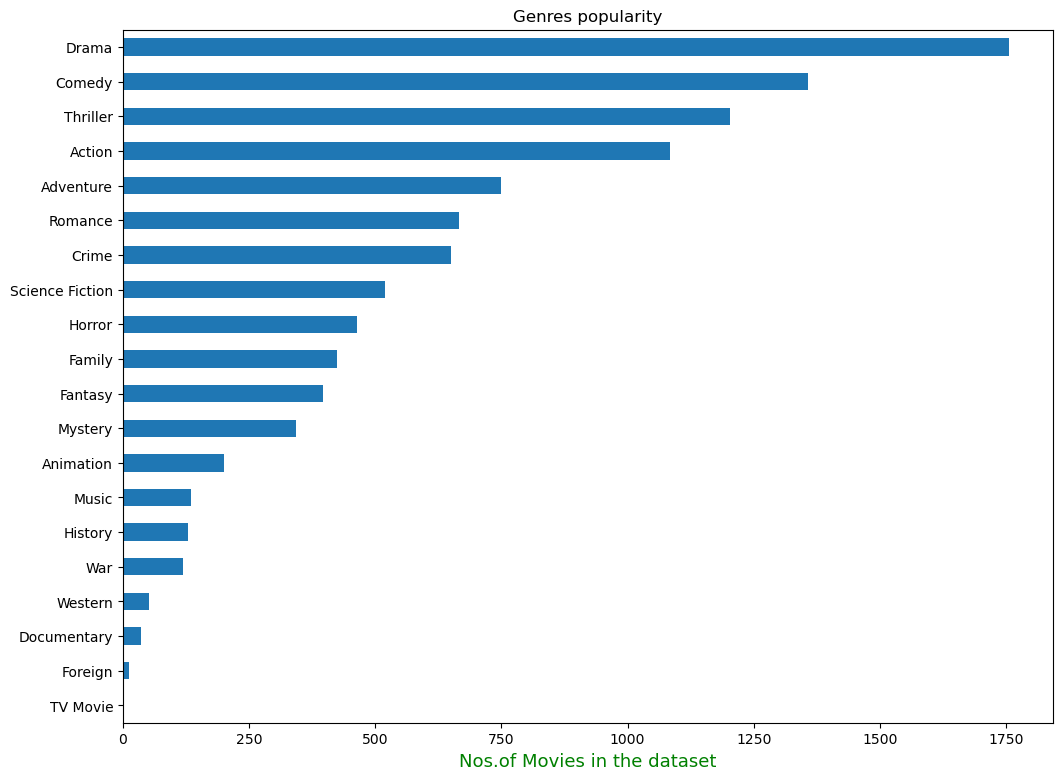

In [130]:
#lets plot the points in descending order top to bottom as we have data in same format.
pop_genres.sort_values(ascending = True, inplace = True)

#ploting
lt = pop_genres.plot.barh()

#title
lt.set(title = 'Genres popularity')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'green', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

as per the above we can see the genres popularity variety

## BUDGETS

### Research Question 2  (max and min movies budget )

In [141]:
max_min('budget')

,2244,2618
profit,-413912431.0,99.0
id,46528,39964
imdb_id,tt1032751,tt0120836
popularity,0.25054,0.090186
budget,425000000.0,1.0
revenue,11087569.0,100.0
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
homepage,http://www.iamrogue.com/thewarriorsway,NaN
director,Sngmoo Lee,Jeff Pollack


> maximum movie budget that was placed was 4.25 \$\
Noting that this movie had no profit as the revenue was nowhere close to the movie budget

> minmum movie budget that was placed was 1 \$\
Noting that this movie had almost a 100 \\$ profit

### Average budget

In [143]:
df['budget'].mean()

37212267.85984947

Average budget of a movie is 37 million

### Budget vs profit

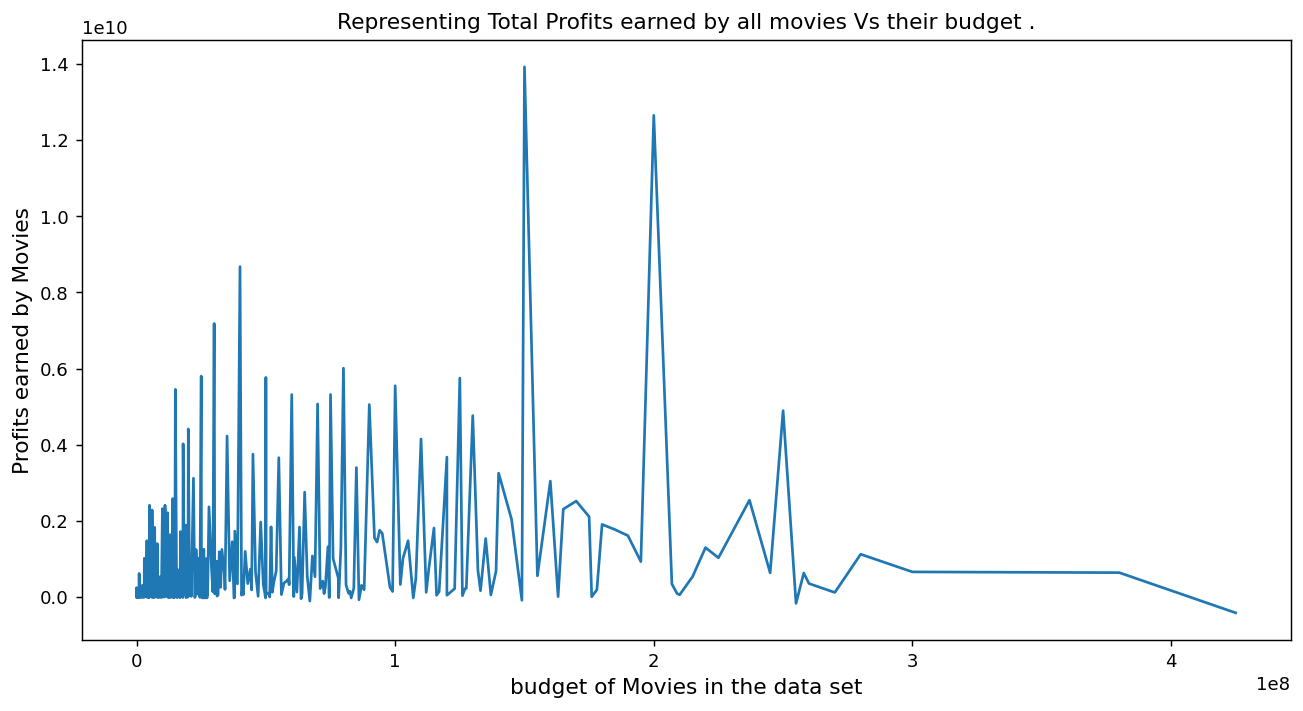

In [150]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_budget = df.groupby('budget')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('budget of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs their budget .')

#plotting the graph
plt.plot(profits_budget)

#displaying the line plot
plt.show()

> From the above plot we can tell that the movie budget is inconsistant with weather or not it has a reasonable profit or not

## REVENUES

### Research Question 2  (max and min movies revenues )

In [146]:
max_min('revenue')

,1386,5067
profit,2544505847.0,-5999998.0
id,19995,13537
imdb_id,tt0499549,tt0323944
popularity,9.432768,0.462609
budget,237000000.0,6000000.0
revenue,2781505847.0,2.0
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
homepage,http://www.avatarmovie.com/,NaN
director,James Cameron,Billy Ray


> The maximum movie revenue was 2 billion \\$ and this movie had profit 2 billion dollars which is above the average profit of our database

> The minimum movie revenue was 2 \\$ and this movie had no profit

### Average revenue

In [147]:
df['revenue'].mean()

107711709.95120685

> The average revenue of a movie was 10.7 million

### profit vs revenue

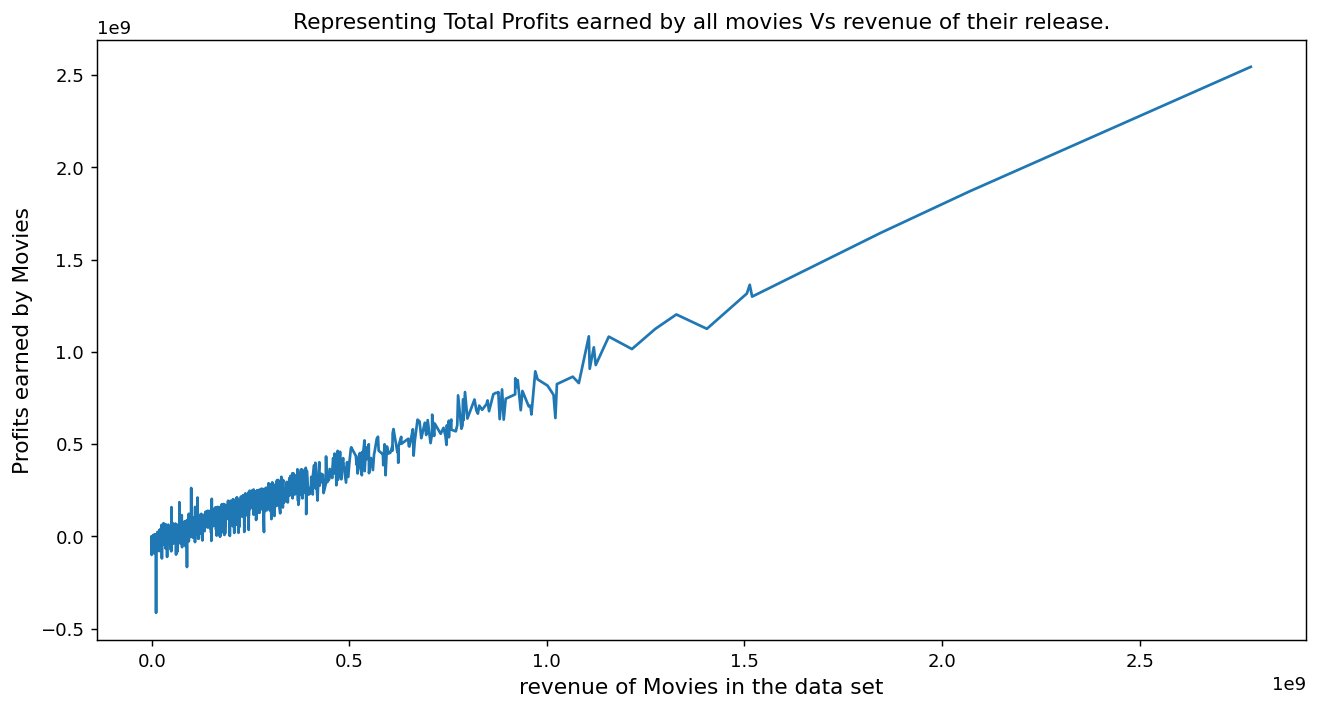

In [149]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_revenue = df.groupby('revenue')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('revenue of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs their revenues .')

#plotting the graph
plt.plot(profits_revenue)

#displaying the line plot
plt.show()

> we can see that it' almost a direct relation between the movie revenue and the movie profit

## RUNTIME

### Research Question 2  (max and min movies runtime )

In [154]:
max_min('runtime')

,2107,5162
profit,-17128721.0,-5.0
id,43434,24914
imdb_id,tt1321865,tt0368574
popularity,0.534192,0.208637
budget,18000000.0,10.0
revenue,871279.0,5.0
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
homepage,NaN,NaN
director,Olivier Assayas,Shinichiro Watanabe


> We can see that the the max run-time is 338 mins and that movie had no profit in our database

> and the minmum run-time was 15 mins with no profit

### Average run-time

In [152]:
df['runtime'].mean()

109.20892810796782

> Average run-time is 109 mins 

### Profit vs runtime

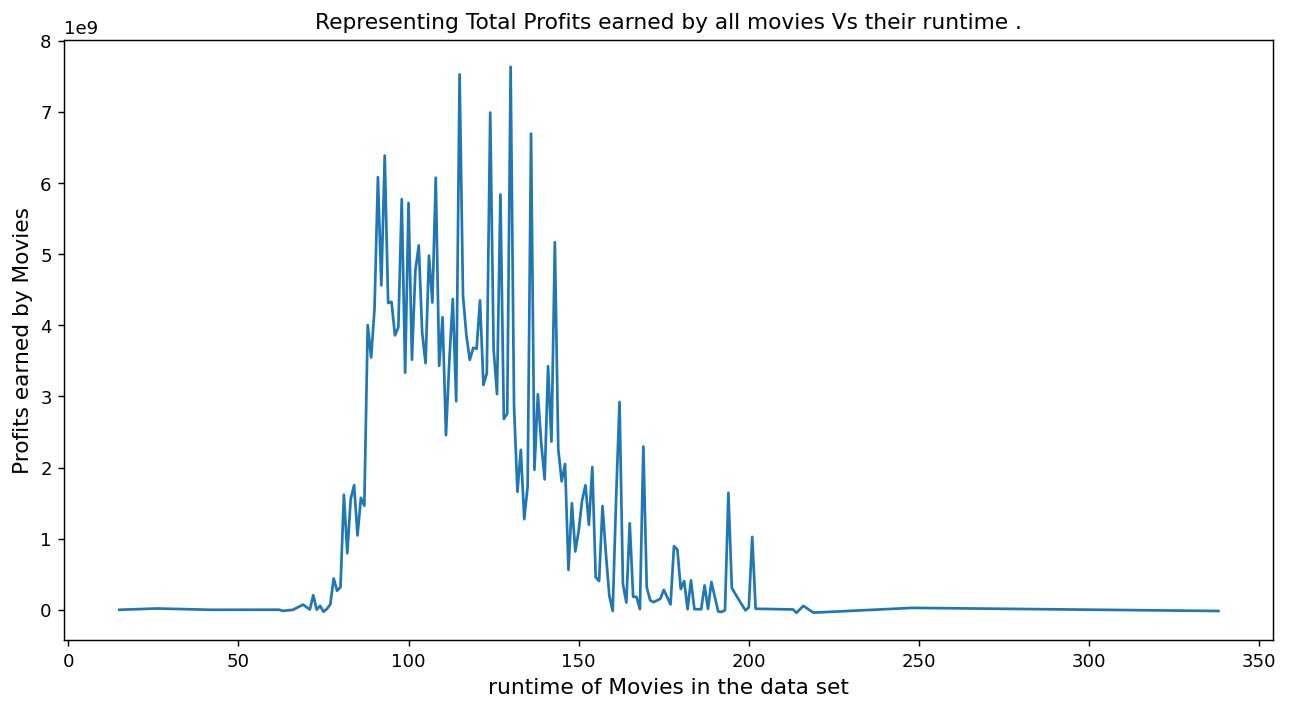

In [153]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_runtime = df.groupby('runtime')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('runtime of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs their runtime .')

#plotting the graph
plt.plot(profits_runtime)

#displaying the line plot
plt.show()

> From the above graph we can very clearly see a certain runtime limit if the movie is less than or more than that range the profits decrease greatly

> The runtime range is starting from 90 mins and leading up to 140 mins

## RELEASE DATE 

### Release month

 Adding a month column that would be needed to determine wich month is better to release a movie in terms of profit

In [156]:
df['month'] = df['release_date'].dt.month
df.head()

,profit,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,1.363529e+09,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,2.284364e+08,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,1.852382e+08,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,1.868178e+09,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,1.316249e+09,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


### Counting the number of movies per month

In [159]:
months_count = df['month'].value_counts(ascending = False)
months_count.head()

9     460
12    415
10    363
6     340
8     337
Name: month, dtype: int64

>This shows that the top 5 months to release a movie are :\
September as number one \
December\
October\
June\
August

### Most frequent release month details

In [225]:
most_freq= months_count.index[0]

#selecting the movies having profit $50M or more
most_freq_details = df[df['month'] == most_freq]

#reindexing new data
most_freq_details.index = range(len(most_freq_details))

#we will start from 1 instead of 0
most_freq_details.index = most_freq_details.index + 1

most_freq_details.describe()

,profit,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,4.600000e+02,460.000000,460.000000,4.600000e+02,4.600000e+02,460.000000,460.000000,460.000000,460.000000,4.600000e+02,4.600000e+02,460.0
mean,2.934598e+07,50235.126087,0.934518,2.368280e+07,5.302878e+07,108.530435,369.269565,6.236522,2004.330435,2.743458e+07,6.330897e+07,9.0
std,7.445674e+07,76877.126605,0.928421,2.170309e+07,8.402199e+07,16.260447,616.548882,0.740439,8.888289,2.469144e+07,1.044551e+08,0.0
min,-6.093994e+07,14.000000,0.045242,8.000000e+00,1.600000e+01,77.000000,10.000000,4.000000,1964.000000,1.144773e+01,2.289547e+01,9.0
25%,-5.957940e+06,9395.500000,0.446134,8.000000e+06,5.861064e+06,97.000000,57.000000,5.700000,2000.000000,8.342812e+06,6.829114e+06,9.0
50%,3.099565e+06,13531.000000,0.661472,1.800000e+07,2.088921e+07,105.500000,149.000000,6.250000,2006.000000,2.025573e+07,2.619640e+07,9.0
75%,3.313056e+07,54771.750000,1.082205,3.200000e+07,5.927417e+07,119.000000,406.250000,6.800000,2011.000000,3.796909e+07,6.877281e+07,9.0
max,6.113927e+08,343795.000000,7.667400,1.500000e+08,7.163927e+08,171.000000,5754.000000,8.400000,2015.000000,1.431331e+08,8.780804e+08,9.0


# neeed to add a comment

### Average profit

In [227]:
most_freq_details['profit'].mean()

29345984.156521738

> Avg profit to the movies in september is around 30 million

### Least frequent release month details

In [245]:
least_freq= months_count.index[-1]
print(least_freq)
#selecting the movies having profit $50M or more
least_freq_details = df[df['month'] == least_freq]

#reindexing new data
least_freq_details.index = range(len(least_freq_details))

#we will start from 1 instead of 0
least_freq_details.index = least_freq_details.index + 1
# least_freq_details.head(3)
least_freq_details.describe()

1


,profit,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,2.250000e+02,225.000000,225.000000,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000,225.000000,2.250000e+02,2.250000e+02,225.0
mean,3.051471e+07,46759.057778,0.966615,2.290748e+07,5.342218e+07,101.680000,368.480000,5.920444,2004.026667,2.574945e+07,7.146060e+07,1.0
std,6.894559e+07,66634.159353,1.136955,2.313325e+07,7.740966e+07,13.973022,620.809466,0.862787,10.034281,2.429627e+07,1.586302e+08,0.0
min,-7.517192e+07,76.000000,0.017708,2.500000e+01,1.200000e+01,77.000000,10.000000,3.300000,1961.000000,2.374361e+01,1.385334e+01,1.0
25%,-3.019662e+06,9457.000000,0.368927,5.500000e+06,6.451628e+06,92.000000,48.000000,5.400000,2001.000000,6.688477e+06,8.630314e+06,1.0
50%,6.836616e+06,14844.000000,0.607687,1.500000e+07,2.901082e+07,100.000000,126.000000,5.900000,2006.000000,1.924295e+07,3.141690e+07,1.0
75%,4.813422e+07,50217.000000,1.054366,3.500000e+07,7.303446e+07,108.000000,438.000000,6.500000,2011.000000,3.798977e+07,7.575887e+07,1.0
max,5.204000e+08,290764.000000,7.031452,1.200000e+08,5.384000e+08,172.000000,4118.000000,8.000000,2015.000000,1.163278e+08,1.574815e+09,1.0


# hena kaman comment

### Average profit

In [233]:
least_freq_details['profit'].mean()

30514708.08

>average profit is 30 million

From this we conclude that the release month has no relation with the profit as we can see that the profit was 30 M in the most frequent and least frequent release months 

### Relase month VS profit

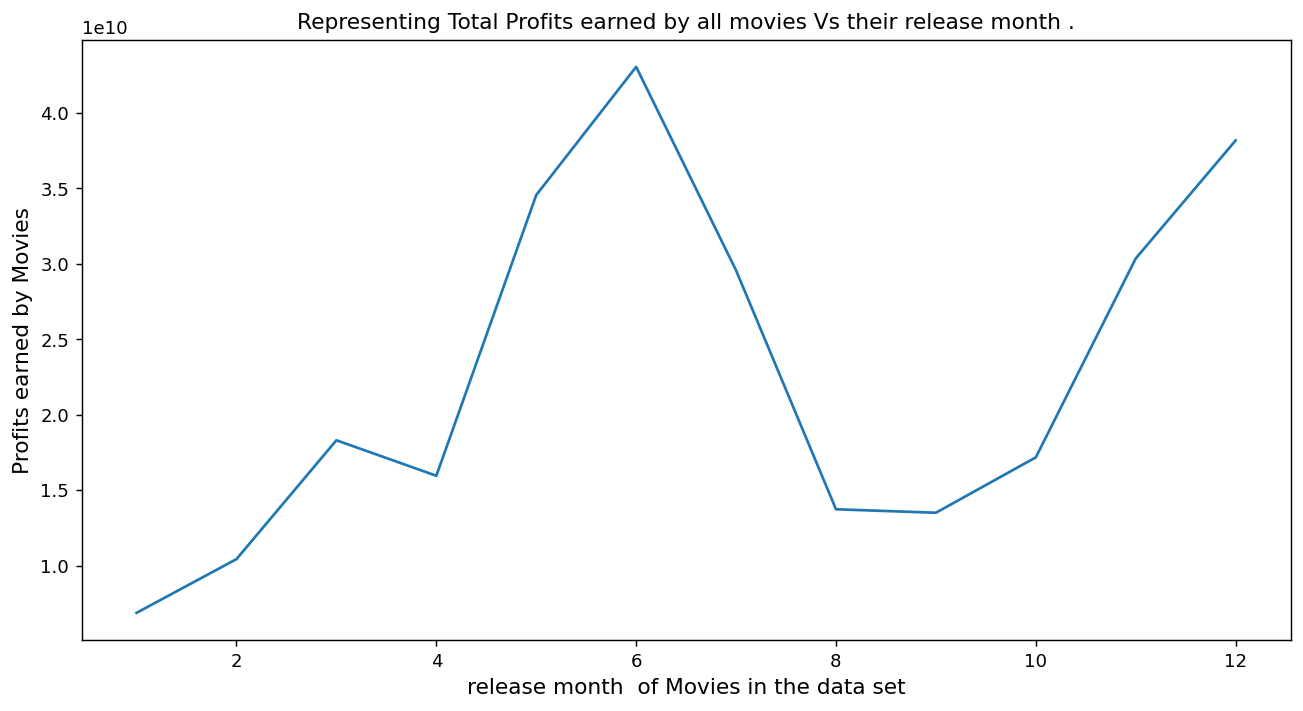

In [164]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_month = df.groupby('month')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('release month  of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs their release month .')

#plotting the graph
plt.plot(profits_month)

#displaying the line plot
plt.show()

The above plot shows the relation between the release month and the profits earned by the movie.
even though previously we found that it doesn't matter which month the movie is released in (as there was 30 M profit in both most and least frequent release months) but still we can see that around the month of June movies tend to have higher profit rate than normal

## CAST

In [252]:

popular_cast = pipe('cast')
top_cast = popular_cast.head(50)
popular_cast.head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64


>This shows that the top 5 actors in a movie are :\
Robert De Niro as number one \
Bruce Willis\
Samuel L. Jackson\
Nicolas Cage\
Matt Damon


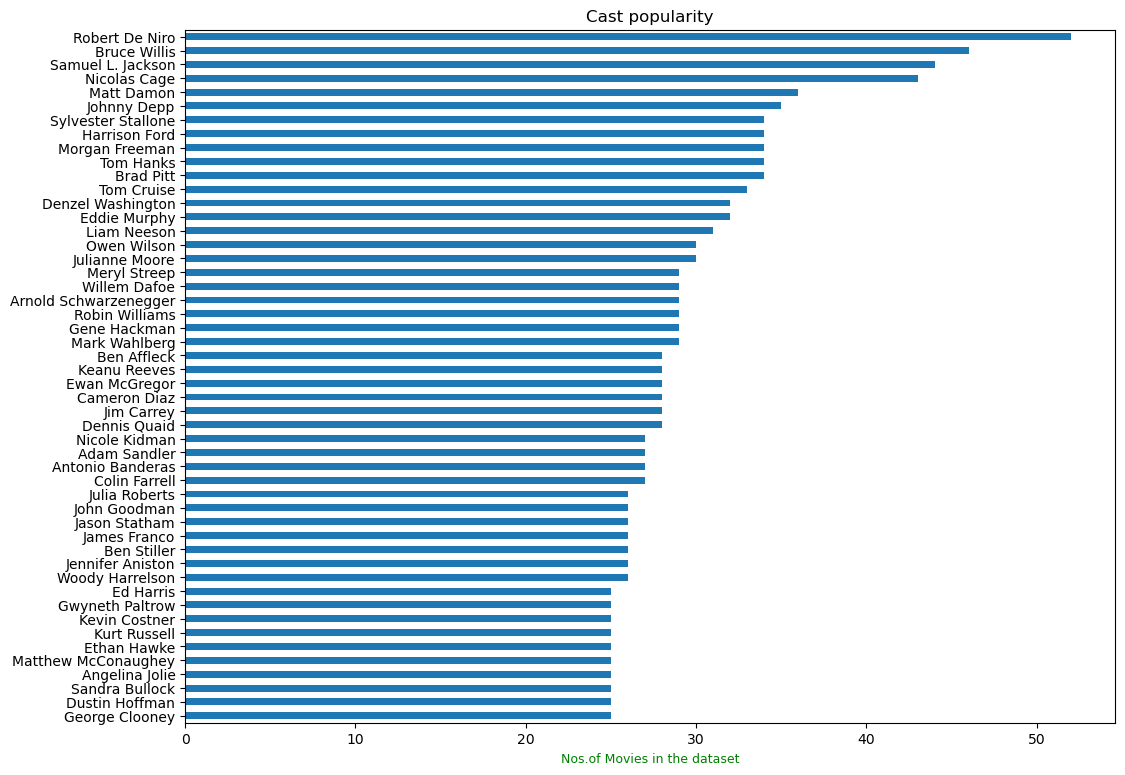

In [253]:
#lets plot the points in descending order top to bottom as we have data in same format.
top_cast.sort_values(ascending = True, inplace = True)

#ploting
lt = top_cast.plot.barh()

#title
lt.set(title = 'Cast popularity')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'green', fontsize = 9)

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

The above is a plot to show the popularity of the actors precisly the top 50 popular actors according to the number of movies the participated in 

## PRODUCTION_COMPANY

In [240]:

popular_prod_company = pipe('production_companies')

popular_prod_company.head()

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
dtype: int64


>This shows that the top 5 production companies to release a movie are :\
Universal Pictures as number one \
Warner Bros.\
Paramount Pictures\
Twentieth Century Fox Film Corporation \
Columbia Pictures 



## KEYWORDS

In [241]:
popular_keyword = pipe('keywords')

popular_keyword.head()

based on novel          168
duringcreditsstinger    101
dystopia                 95
sex                      90
independent film         86
dtype: int64

>This shows that the top 5 popular movie keywords in a movie are :\
based on novel\
duringcreditsstinger\
dystopia\
sex\
independent film 




## DIRECTOR

In [254]:
popular_director= pipe('director')
top_director = popular_director.head(50)
popular_director.head()

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Tim Burton          17
dtype: int64

>This shows that the top 5 popular movie director in a movie are :\
Steven Spielberg\
Clint Eastwood\
Ridley Scott\
Woody Allen\
Tim Burton          

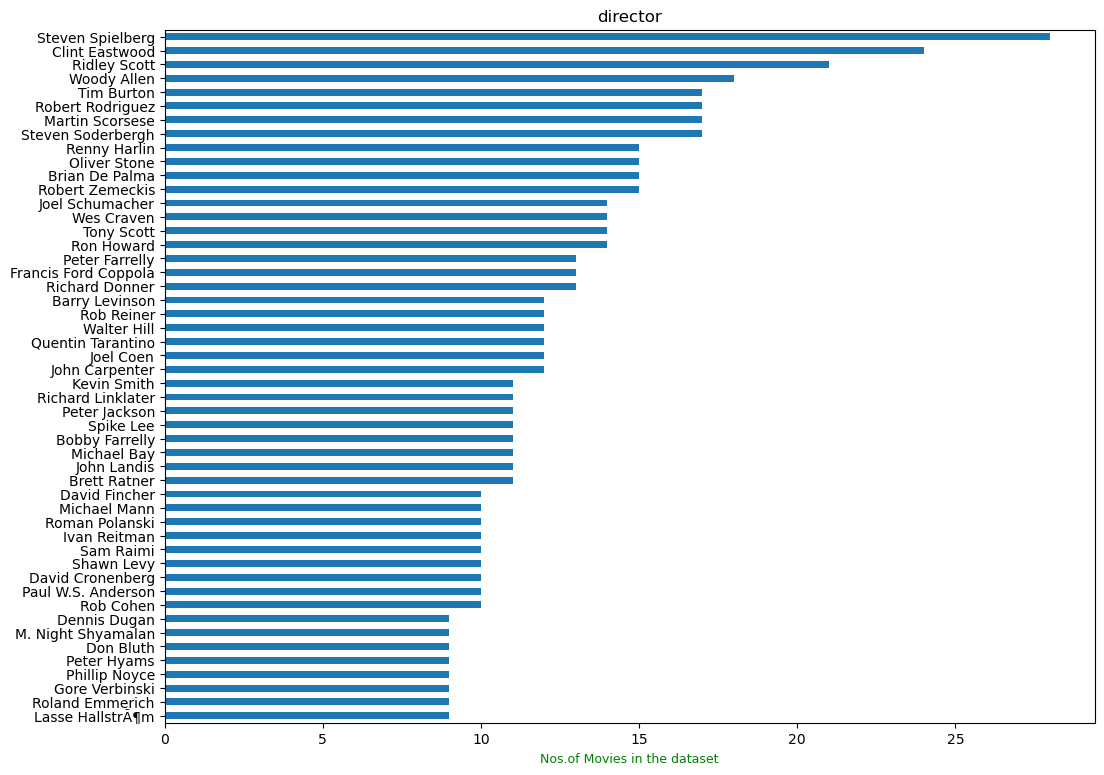

In [256]:
#lets plot the points in descending order top to bottom as we have data in same format.
top_director.sort_values(ascending = True, inplace = True)

#ploting
lt = top_director.plot.barh()

#title
lt.set(title = 'director')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'green', fontsize = 9)

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

The above is a plot to show the popularity of the directors precisly the top 50 popular directors according to they number of movies they helped direct 

<a id='conclusions'></a>
## Conclusions

#### In conclusion I found that in case of wanting to produce a new film 
### Average budget to place for the movie should be around 37 million
### Cast containing all or some of the following members
         - Robert De Niro
         - Bruce Willis
         - Samuel L. Jackson
         - Nicolas Cage
         - Matt Damon
### The keywords to consider when thinking of the movie plots are 
         - based on novel
         - duringcreditsstinger
         - dystopia
         - sex
         - independent film
         
### The movie Genre should be one of the following 
         - Drama        
         - Comedy     
         - Thriller   
         - Action     
         - Adventure
         
### The movie average runtime should be around 109 mins or between the range we saw from the graph which was starting from 90 mins and leading up to 140 mins
### The movie production company should be one of the following
         - Universal Pictures
         - Warner Bros.
         - Paramount Pictures
         - Twentieth Century Fox Film Corporation
         - Columbia Pictures
         
### The movie directer should be one of the following
         - Steven Spielberg
         - Clint Eastwood
         - Ridley Scott
         - Woody Allen
         - Tim Burton
### It would be more beneficial if the movie was to be released around the month of september but that still doesn't gurante the movie's success as we saw in the above graphs

### If we keep in mind the above conditions we can gurante creating a high profit movie based on my observation to the data sheet provided
 

## Limitations 
    
     One of the main thing that limited my data analysis was deciding which graph to use to better represent the data i had . especially having that much data availsble to plot .
     Another thing was some columns provided were a little confusing on what their purpose was like the revenue_adj and the budget_adj especially since they almost had the same values as the original revenue and budget columns